<a href="https://colab.research.google.com/github/Melan120322/bijikopi/blob/main/belajar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Who Will Move to a New Job (Predictive Analytics)

## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train = pd.read_csv('https://github.com/jldbc/coffee-quality-database/blame/master/data/arabica_data_cleaned.csv') #membaca data dari link github
train.head()

ParserError: ignored

In [ ]:
train = train.drop(['enrollee_id'], axis=1) # Membuang kolom enrollee_id

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


## Data Exploration

In [ ]:
train.target.value_counts() # value dari kolom target

0.0    14381
1.0     4777
Name: target, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [ ]:
train.describe().T # data yang isinya angka

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


(-0.5, 1.5, 0.0, 0.97405)

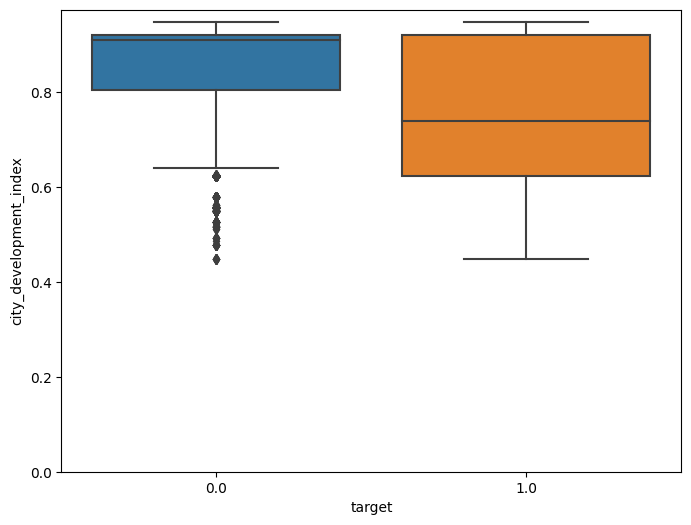

In [ ]:
var = 'target'
data = pd.concat([train['city_development_index'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="city_development_index", data=data)
fig.axis(ymin=0)

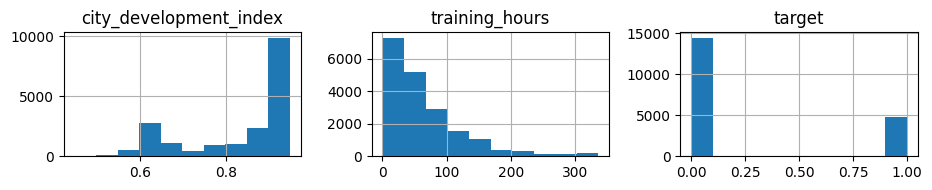

In [ ]:
train.hist(layout=(5,4), figsize=(15,10))

plt.show()

<Axes: >

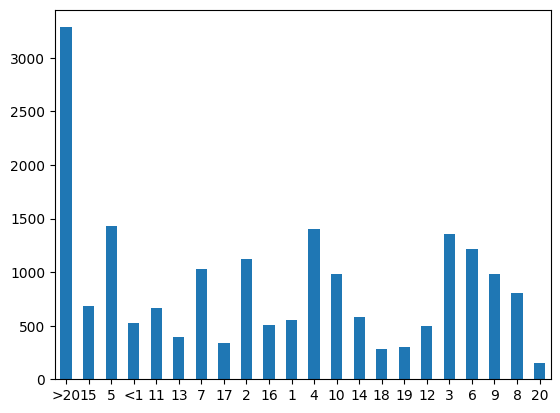

In [ ]:
train['experience'].value_counts(sort=False).plot.bar(rot=0)

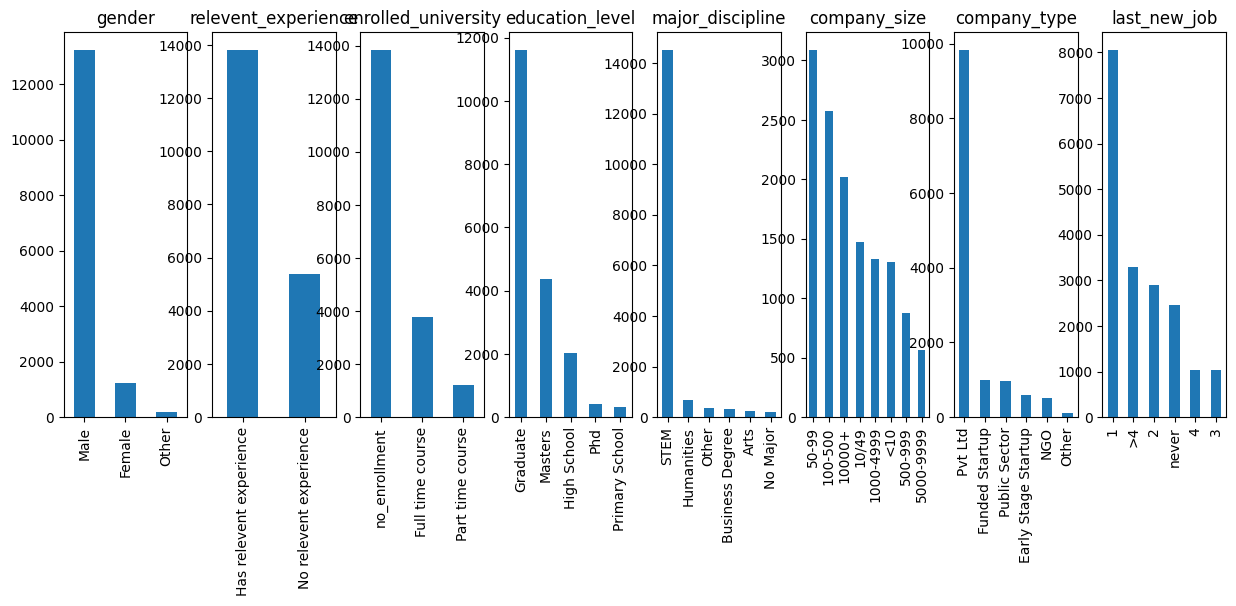

In [ ]:
categorical_features = [
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(15, 5))
for i, categorical_feature in enumerate(train[categorical_features]):
    train[categorical_feature].value_counts().plot(kind='bar', ax=ax[i]).set_title(categorical_feature)
fig.show()

<Axes: >

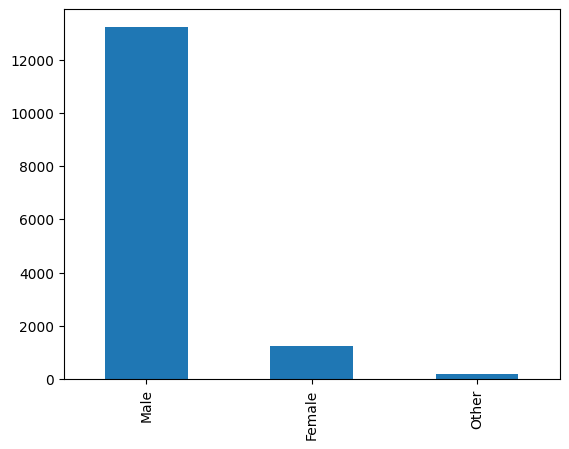

In [ ]:
train['gender'].value_counts().plot(kind='bar')

## Preprocessing

### Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop(['target'], axis=1)
y = train.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Handle categorical data with ordinal encoding

In [ ]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [ ]:
X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
8253,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,7,<10,Early Stage Startup,1,40
10067,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,19,100-500,Pvt Ltd,2,48
1851,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,1,135
4139,city_19,0.682,Male,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,45
2473,city_21,0.624,Male,No relevent experience,Full time course,High School,NaN,10,NaN,NaN,never,68


In [ ]:
for col in object_cols:
    print(col, X_train[col].unique().size)

city 121
gender 4
relevent_experience 2
enrolled_university 4
education_level 6
major_discipline 7
experience 23
company_size 9
company_type 7
last_new_job 7


In [ ]:
X_train['experience'].unique()

array(['7', '19', '5', '2', '10', '4', '17', '15', '12', '8', '>20', '6',
       '13', '11', '16', '14', '20', '3', '1', '9', '18', '<1', nan],
      dtype=object)

In [ ]:
X_train.loc[X_train['experience'] == '<1', 'experience'] = '0'
X_train.loc[X_train['experience'] == '>20', 'experience'] = '21'

X_test.loc[X_test['experience'] == '<1', 'experience'] = '0'
X_test.loc[X_test['experience'] == '>20', 'experience'] = '21'

In [ ]:
X_train['experience'].unique()

array(['7', '19', '5', '2', '10', '4', '17', '15', '12', '8', '21', '6',
       '13', '11', '16', '14', '20', '3', '1', '9', '18', '0', nan],
      dtype=object)

In [ ]:
X_test['experience'].unique()

array(['6', '21', '9', '15', '12', '13', '1', '2', '10', '7', '8', '3',
       '18', '5', '0', '16', '4', '11', '14', '19', '17', nan, '20'],
      dtype=object)

In [ ]:
X_train['major_discipline'].unique()

array(['STEM', nan, 'Other', 'Humanities', 'Business Degree', 'Arts',
       'No Major'], dtype=object)

In [ ]:
X_train['company_type'].unique()

array(['Early Stage Startup', 'Pvt Ltd', nan, 'Public Sector', 'NGO',
       'Other', 'Funded Startup'], dtype=object)

In [ ]:
X_train.head(1)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
8253,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,7,<10,Early Stage Startup,1,40


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[['major_discipline', 'company_type']]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[['major_discipline', 'company_type']]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_test.index

In [ ]:
OH_cols_train.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
8253,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
major_labels = ['STEM', 'nan', 'Other', 'Humanities', 'Business Degree', 'Arts', 'No Major']
company_labels = ['Early Stage Startup', 'Pvt Ltd', 'nan', 'Public Sector', 'NGO', 'Other', 'Funded Startup']

major_labels.sort()
company_labels.sort()

In [ ]:
OH_cols = major_labels + company_labels
OH_cols

['Arts',
 'Business Degree',
 'Humanities',
 'No Major',
 'Other',
 'STEM',
 'nan',
 'Early Stage Startup',
 'Funded Startup',
 'NGO',
 'Other',
 'Public Sector',
 'Pvt Ltd',
 'nan']

In [ ]:
OH_cols_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
8253,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10067,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1851,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
OH_cols_train.columns = OH_cols
OH_cols_valid.columns = OH_cols

In [ ]:
OH_cols_train.drop(['nan'], inplace=True, axis=1)
OH_cols_valid.drop(['nan'], inplace=True, axis=1)

In [ ]:
OH_cols_train.head(1)

,Arts,Business Degree,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
8253,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num_X_train = X_train.drop(['major_discipline', 'company_type'], axis=1)
num_X_valid = X_test.drop(['major_discipline', 'company_type'], axis=1)

In [ ]:
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
OH_X_train.head(1)

In [ ]:
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [ ]:
OH_X_train.head(1)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
8253,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,7,<10,1,40,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
OH_X_train.company_size.unique()

array(['<10', '100-500', nan, '50-99', '5000-9999', '10/49', '10000+',
       '1000-4999', '500-999'], dtype=object)

In [ ]:
OH_X_train['experience'] = OH_X_train['experience'].astype('float64')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
s = (OH_X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols = object_cols[1:]

In [ ]:
object_cols

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'company_size',
 'last_new_job']

In [ ]:
label_X_train = OH_X_train.copy()
label_X_valid = OH_X_valid.copy()

In [ ]:
label_X_train.head(1)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
8253,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,7.0,<10,1,40,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(OH_X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(OH_X_valid[object_cols])

In [ ]:
label_X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
8253,city_21,0.624,NaN,0.0,2.0,2.0,7.0,7.0,0.0,40,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10067,city_103,0.920,1.0,0.0,2.0,0.0,19.0,1.0,1.0,48,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1851,city_21,0.624,NaN,0.0,2.0,0.0,5.0,NaN,0.0,135,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,city_19,0.682,1.0,1.0,0.0,0.0,2.0,NaN,5.0,45,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2473,city_21,0.624,1.0,1.0,0.0,1.0,10.0,NaN,5.0,68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_X_train = label_X_train.drop(['city'], axis=1)
label_X_valid = label_X_valid.drop(['city'], axis=1)

In [ ]:
label_X_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Arts,...,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
8253,0.624,NaN,0.0,2.0,2.0,7.0,7.0,0.0,40,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10067,0.920,1.0,0.0,2.0,0.0,19.0,1.0,1.0,48,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1851,0.624,NaN,0.0,2.0,0.0,5.0,NaN,0.0,135,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,0.682,1.0,1.0,0.0,0.0,2.0,NaN,5.0,45,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2473,0.624,1.0,1.0,0.0,1.0,10.0,NaN,5.0,68,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Handling Missing Values

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

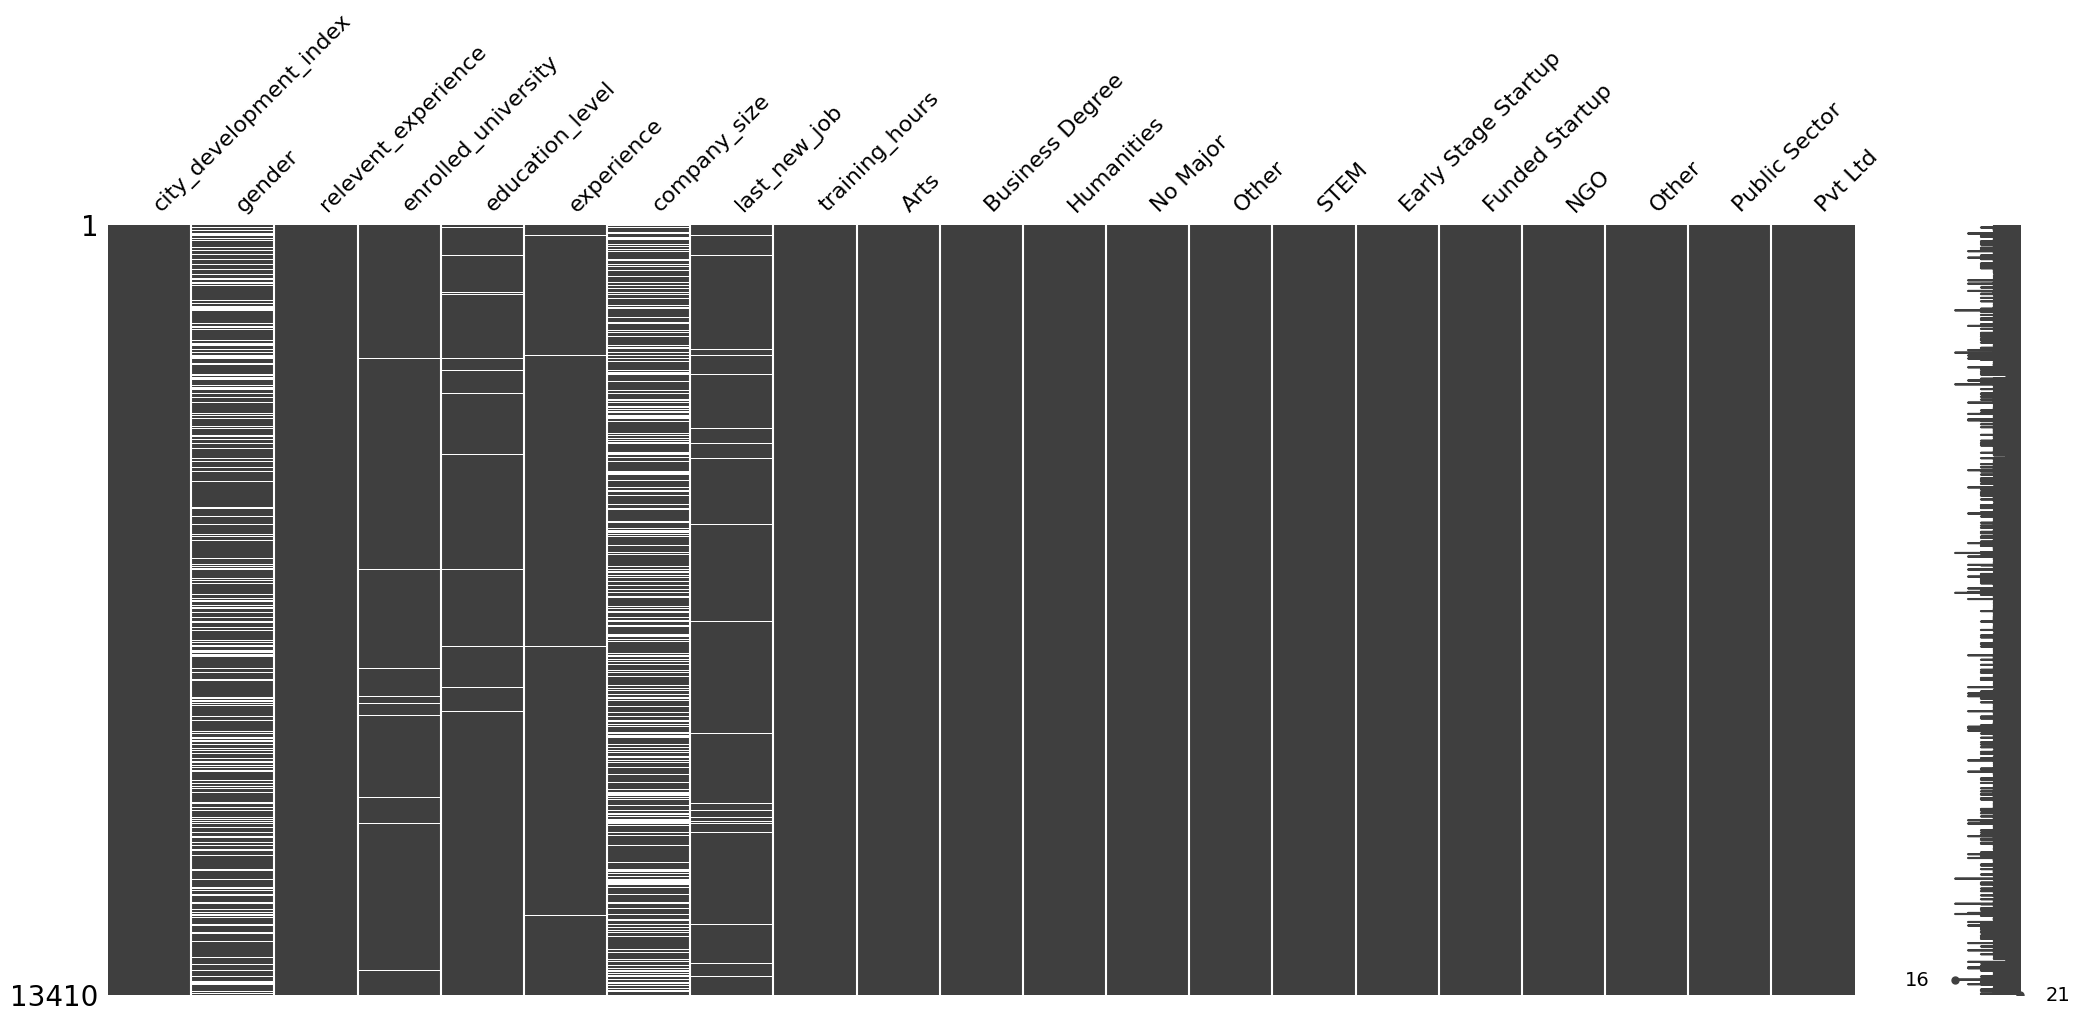

<Figure size 1500x900 with 0 Axes>

In [ ]:
msno.matrix(label_X_train)
plt.figure(figsize = (15,9))
plt.show()

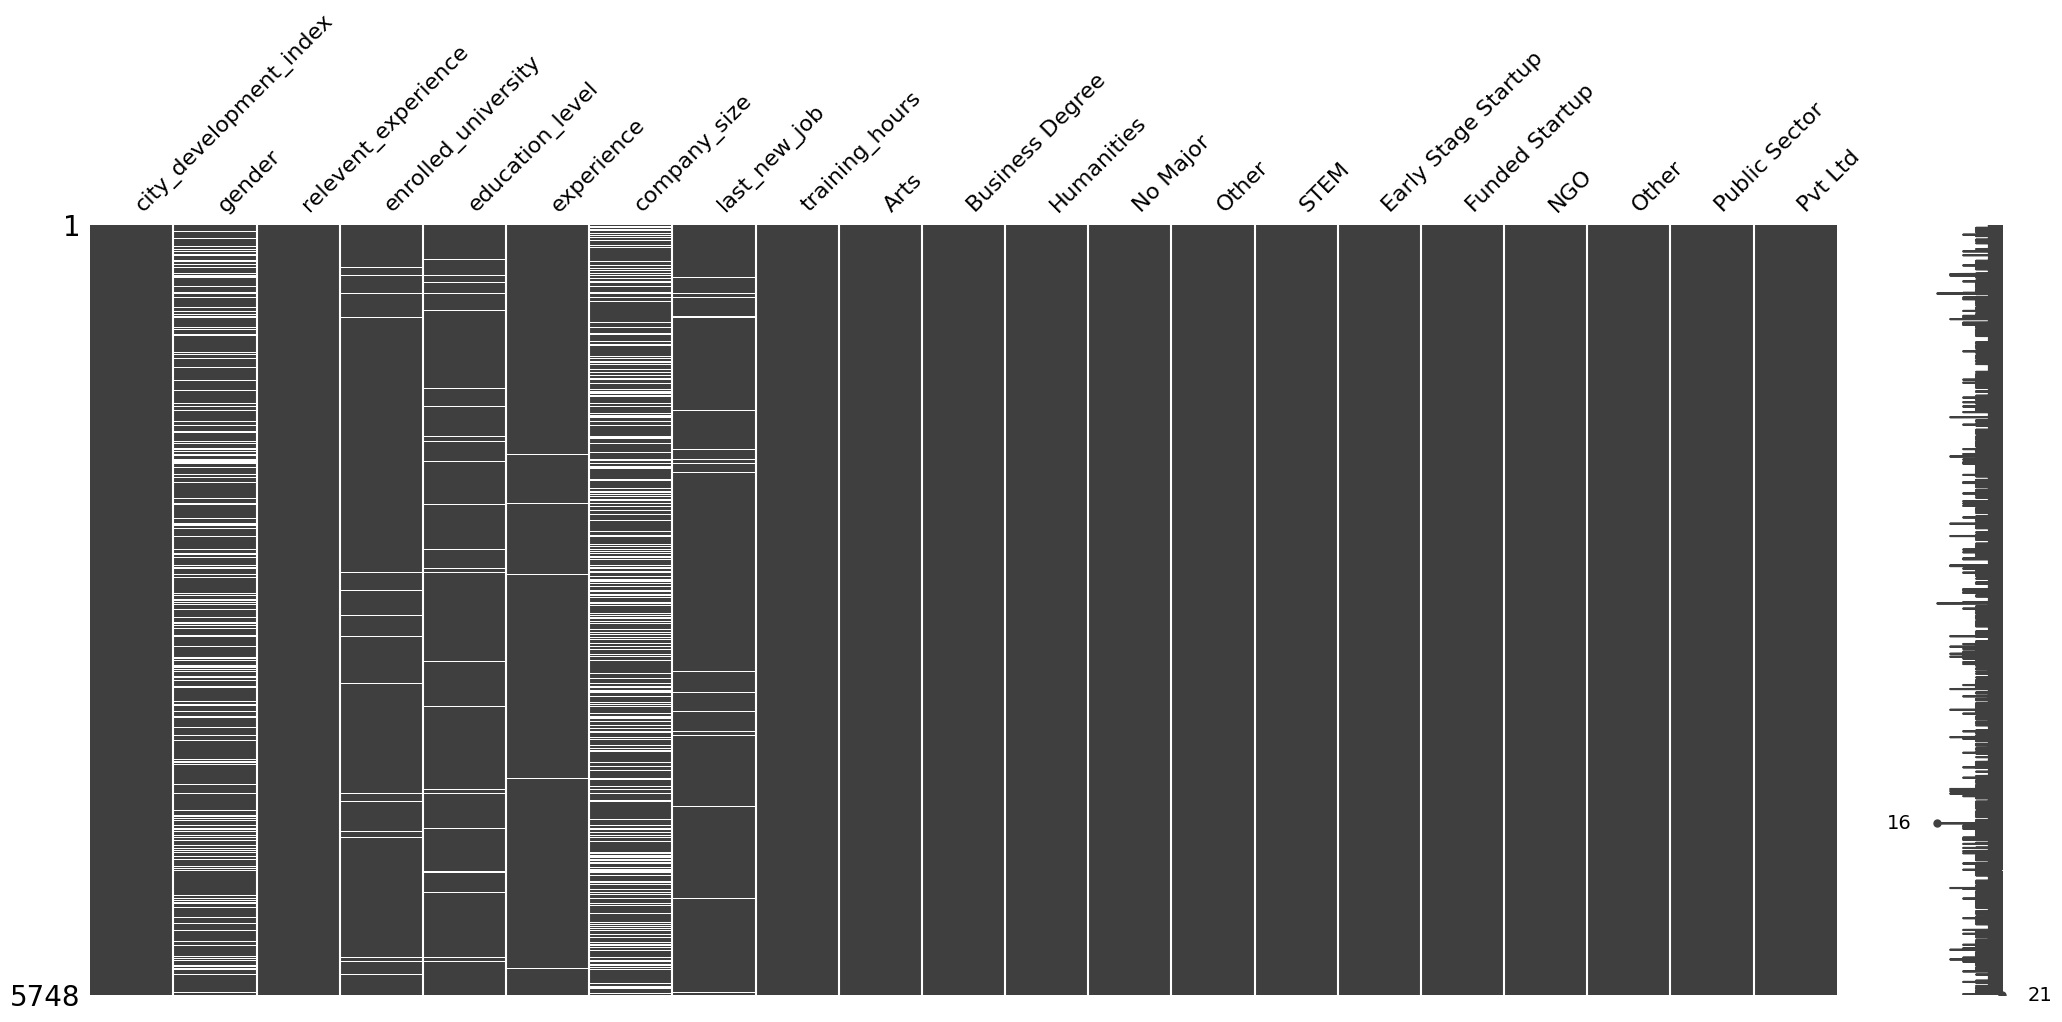

<Figure size 1500x900 with 0 Axes>

In [ ]:
msno.matrix(label_X_valid)
plt.figure(figsize = (15,9))
plt.show()

In [ ]:
label_X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 16144 to 8355
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  5748 non-null   float64
 1   gender                  4433 non-null   float64
 2   relevent_experience     5748 non-null   float64
 3   enrolled_university     5628 non-null   float64
 4   education_level         5607 non-null   float64
 5   experience              5725 non-null   object 
 6   company_size            3984 non-null   float64
 7   last_new_job            5616 non-null   float64
 8   training_hours          5748 non-null   int64  
 9   Arts                    5748 non-null   float64
 10  Business Degree         5748 non-null   float64
 11  Humanities              5748 non-null   float64
 12  No Major                5748 non-null   float64
 13  Other                   5748 non-null   float64
 14  STEM                    5748 non-nul

#### Impute missing values

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors = 3)
imputed_X_train = pd.DataFrame(knn_imputer.fit_transform(label_X_train))
imputed_X_valid = pd.DataFrame(knn_imputer.transform(label_X_valid))

imputed_X_train.columns = label_X_train.columns
imputed_X_valid.columns = label_X_valid.columns

imputed_X_train.index = X_train.index
imputed_X_valid.index = X_test.index


X_train = imputed_X_train
X_test = imputed_X_valid

In [ ]:
X_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Arts,...,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
8253,0.624,1.0,0.0,2.0,2.0,7.0,7.000000,0.0,40.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10067,0.920,1.0,0.0,2.0,0.0,19.0,1.000000,1.0,48.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1851,0.624,1.0,0.0,2.0,0.0,5.0,2.000000,0.0,135.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,0.682,1.0,1.0,0.0,0.0,2.0,5.666667,5.0,45.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2473,0.624,1.0,1.0,0.0,1.0,10.0,3.333333,5.0,68.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scalled = pd.DataFrame(scaler.fit_transform(X_train))
X_valid_scalled = pd.DataFrame(scaler.transform(X_test))

X_train_scalled.columns = label_X_train.columns
X_valid_scalled.columns = label_X_valid.columns

X_train_scalled.index = X_train.index
X_valid_scalled.index = X_test.index

X_train = X_train_scalled
X_test = X_valid_scalled

In [ ]:
X_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Arts,...,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
8253,0.351297,0.5,0.0,1.0,0.50,0.333333,1.000000,0.0,0.116418,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10067,0.942116,0.5,0.0,1.0,0.00,0.904762,0.142857,0.2,0.140299,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1851,0.351297,0.5,0.0,1.0,0.00,0.238095,0.285714,0.0,0.400000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,0.467066,0.5,1.0,0.0,0.00,0.095238,0.809524,1.0,0.131343,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2473,0.351297,0.5,1.0,0.0,0.25,0.476190,0.476190,1.0,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'Arts', 'Business Degree',
       'Humanities', 'No Major', 'Other', 'STEM', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Other', 'Public Sector', 'Pvt Ltd'],
      dtype='object')

In [ ]:
X_train = X_train.drop(['Other'], axis=1)
X_test = X_test.drop(['Other'], axis=1)

## Statistical Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
stat = pd.concat([X_train, y_train], axis=1)

In [ ]:
stat.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Arts,Business Degree,Humanities,No Major,STEM,Early Stage Startup,Funded Startup,NGO,Public Sector,Pvt Ltd,target
8253,0.351297,0.5,0.0,1.0,0.50,0.333333,1.000000,0.0,0.116418,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10067,0.942116,0.5,0.0,1.0,0.00,0.904762,0.142857,0.2,0.140299,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1851,0.351297,0.5,0.0,1.0,0.00,0.238095,0.285714,0.0,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,0.467066,0.5,1.0,0.0,0.00,0.095238,0.809524,1.0,0.131343,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2473,0.351297,0.5,1.0,0.0,0.25,0.476190,0.476190,1.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Correlation

In [ ]:
correlation_matrix = stat.corr()

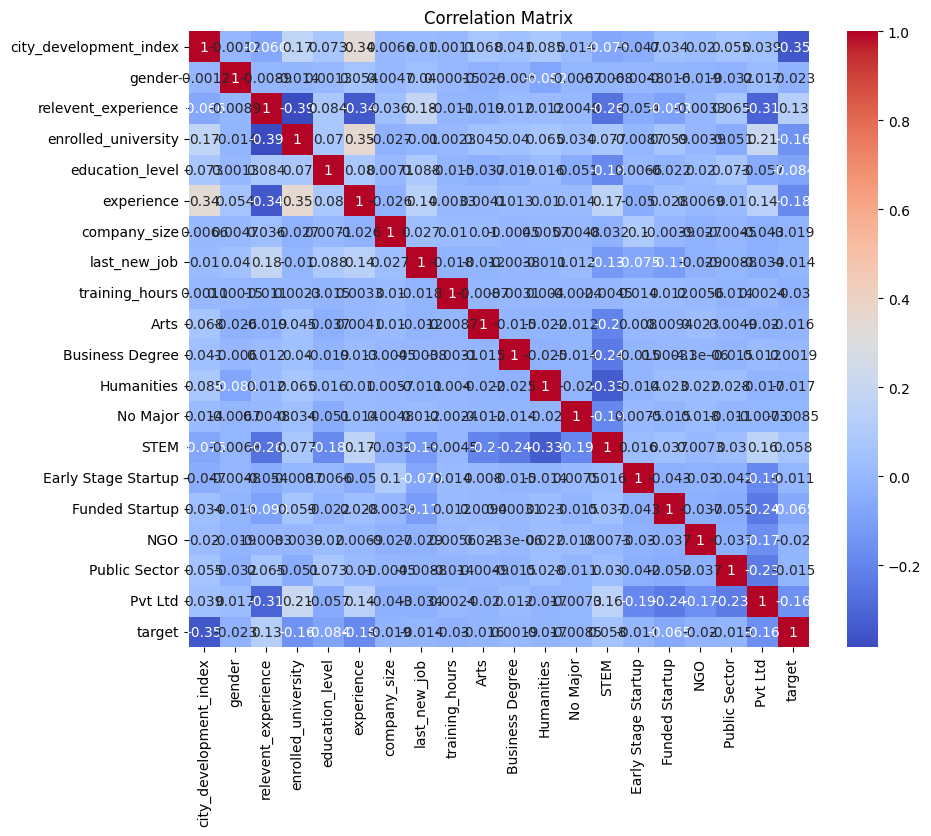

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Modeling

### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = model_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.7153792623521225

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.773312456506611

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = model_svm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_svm)

0.7677453027139874

### XGBoost

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_xgb)

0.7715727209464162

In [ ]:
model_xgb.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_test, y_test)],
             verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7792275574112735

### Tuning Random Forest

In [ ]:
model_rft = RandomForestClassifier(random_state=42, n_estimators = 100, criterion="gini")

In [ ]:
model_rft.fit(X_train, y_train)
y_pred_rft = model_rft.predict(X_test)
accuracy_score(y_test, y_pred_rft)

0.773312456506611

### Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_confusion_mat = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Confusion Matrix:")
print(xgb_confusion_mat)

XGBoost
Accuracy: 0.7792275574112735
Precision: 0.5759117896522477
Recall: 0.46892265193370164
F1 Score: 0.5169394746859535
Confusion Matrix:
[[3800  500]
 [ 769  679]]


In [ ]:
rft_accuracy = accuracy_score(y_test, y_pred_rft)
rft_precision = precision_score(y_test, y_pred_rft)
rft_recall = recall_score(y_test, y_pred_rft)
rft_f1 = f1_score(y_test, y_pred_rft)
rft_confusion_mat = confusion_matrix(y_test, y_pred_rft)

print("Random Forest")
print("Accuracy:", rft_accuracy)
print("Precision:", rft_precision)
print("Recall:", rft_recall)
print("F1 Score:", rft_f1)
print("Confusion Matrix:")
print(rft_confusion_mat)

Random Forest
Accuracy: 0.773312456506611
Precision: 0.5699132111861138
Recall: 0.40814917127071826
F1 Score: 0.4756539235412475
Confusion Matrix:
[[3854  446]
 [ 857  591]]


In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_confusion_mat = confusion_matrix(y_test, y_pred_svm)

print("SVM")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Confusion Matrix:")
print(svm_confusion_mat)

SVM
Accuracy: 0.7677453027139874
Precision: 0.5768707482993197
Recall: 0.292817679558011
F1 Score: 0.38845625286303254
Confusion Matrix:
[[3989  311]
 [1024  424]]


### Prediction

In [ ]:
testing = pd.read_csv('https://raw.githubusercontent.com/nafnaufal/datasets/main/HR%20Data%20Analytics/aug_test.csv')
testing = testing.drop(['enrollee_id'], axis=1)

In [ ]:
testing.head()
testing.loc[testing['experience'] == '<1', 'experience'] = '0'
testing.loc[testing['experience'] == '>20', 'experience'] = '21'
OH_cols_testing = pd.DataFrame(OH_encoder.transform(testing[['major_discipline', 'company_type']]))
OH_cols_testing.index = testing[['major_discipline', 'company_type']].index
OH_cols_testing.columns = OH_cols
OH_cols_testing.drop(['nan'], inplace=True, axis=1)
num_testing = testing.drop(['major_discipline', 'company_type'], axis=1)
OH_testing = pd.concat([num_testing, OH_cols_testing], axis=1)
OH_testing.columns = OH_testing.columns.astype(str)
OH_testing['experience'] = OH_testing['experience'].astype('float64')
label_testing = OH_testing.copy()
label_testing[object_cols] = ordinal_encoder.transform(OH_testing[object_cols])
label_testing.drop(['city'], axis = 1, inplace=True)
imputed_testing = pd.DataFrame(knn_imputer.transform(label_testing))
imputed_testing.columns = label_testing.columns
testing = pd.DataFrame(scaler.transform(imputed_testing))
testing.columns = label_testing.columns
testing.drop(['Other'], axis=1, inplace=True)

In [ ]:
testing.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Arts,Business Degree,Humanities,No Major,STEM,Early Stage Startup,Funded Startup,NGO,Public Sector,Pvt Ltd
0,0.756487,0.5,0.0,0.0,0.00,0.428571,1.000000,0.0,0.059701,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.942116,0.0,0.0,1.0,0.00,0.238095,0.380952,0.0,0.289552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.351297,0.5,1.0,1.0,0.25,0.000000,0.285714,1.0,0.041791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.756487,0.5,0.0,1.0,0.50,0.523810,0.000000,0.0,0.113433,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.942116,0.5,0.0,1.0,0.00,1.000000,0.428571,0.8,0.211940,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
result = model_xgb.predict(testing)

In [ ]:
result

array([0, 0, 1, ..., 0, 0, 0])

## Feature Importance and PDP

In [ ]:
feature_importances = model_xgb.feature_importances_

In [ ]:
feature_names = ['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'Arts', 'Business Degree',
       'Humanities', 'No Major','STEM', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Public Sector', 'Pvt Ltd']

In [ ]:
sorted_indices = feature_importances.argsort()[::-1]

In [ ]:
import matplotlib.pyplot as plt

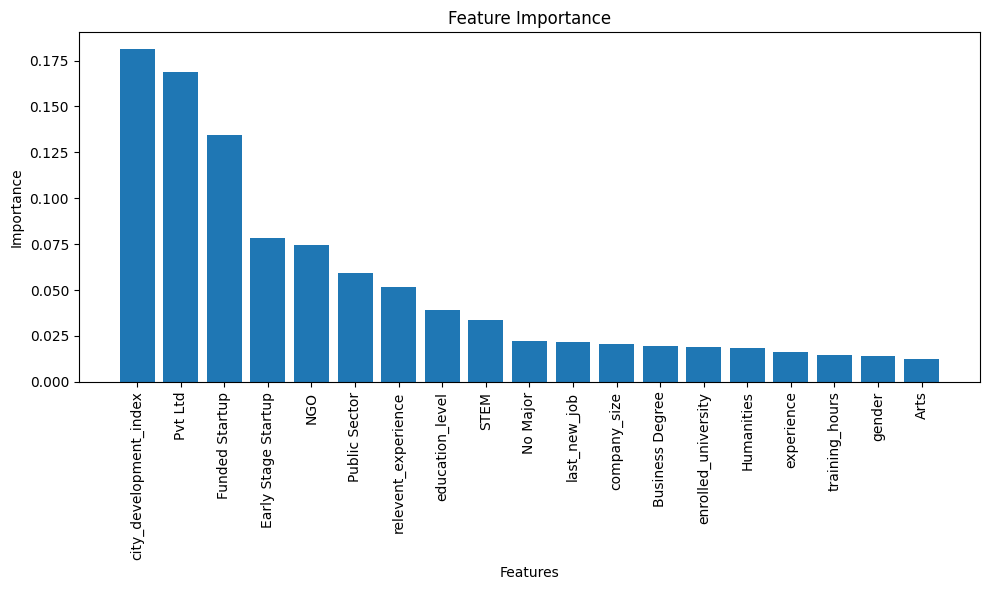

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence,
                                PartialDependenceDisplay)

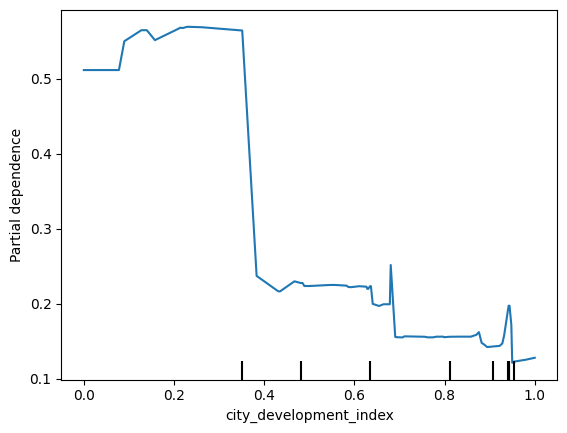

In [ ]:
var = 'city_development_index'
PartialDependenceDisplay.from_estimator(model_xgb, testing, [var]);

In [ ]:
from sklearn.inspection import partial_dependence
import numpy as np

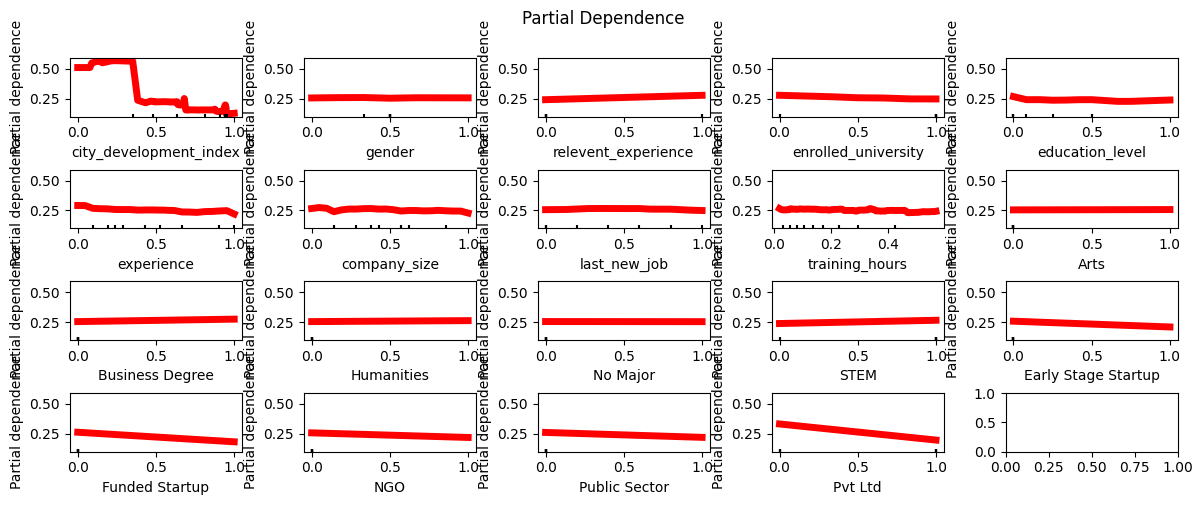

In [ ]:
features_for_pdp = ['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'Arts', 'Business Degree',
       'Humanities', 'No Major','STEM', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Public Sector', 'Pvt Ltd']

fig, axs = plt.subplots(4, 5, figsize=(12, 5))
plt.suptitle('Partial Dependence', y=1.0)
PartialDependenceDisplay.from_estimator(model_xgb, testing,
                                        features_for_pdp,
                                        line_kw={"color": "red", 'lw': 5},
                                        ax=axs.ravel()[:len(features_for_pdp)])
plt.tight_layout(h_pad=0.3, w_pad=0.5)
plt.show()